<a href="https://colab.research.google.com/github/PManiAwasthi/IIITH-FMML-course-Assignments/blob/main/Module6_Project_fmml20210268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 Project: Covid Data Analysis with Regression

`Module Coordinator: Pranav Tadimeti`

In this project, we will use the concepts of regression and regularization we have learnt to predict early Covid-19 cases. We shall use linear regression, polynomial regression and ridge regression to obtain a reasonably good estimate of the future cases. Try experimenting with hyperparameters to obtain better results.

## Data Analysis

### 1. **Load the data** into a pandas dataframe.

In [ ]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error, r2_score
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [ ]:
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
print(df_orig.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [ ]:
df = copy.deepcopy(df_orig)
df.drop('Last Update',inplace=True,axis=1)
date_lst  = df.ObservationDate.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp
    

In [ ]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp
    

In [ ]:
 df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots)

            Confirmed   Deaths  Recovered
01/22/2020      555.0     17.0       28.0
01/23/2020      653.0     18.0       30.0
01/24/2020      941.0     26.0       36.0
01/25/2020     1438.0     42.0       39.0
01/26/2020     2118.0     56.0       52.0
...               ...      ...        ...
03/27/2020   593291.0  27198.0   130915.0
03/28/2020   660706.0  30652.0   139415.0
03/29/2020   720117.0  33925.0   149082.0
03/30/2020   782365.0  37582.0   164566.0
03/31/2020   857487.0  42107.0   178034.0

[70 rows x 3 columns]


### 3. **Plot** the total number of cases per day over time and summarize findings

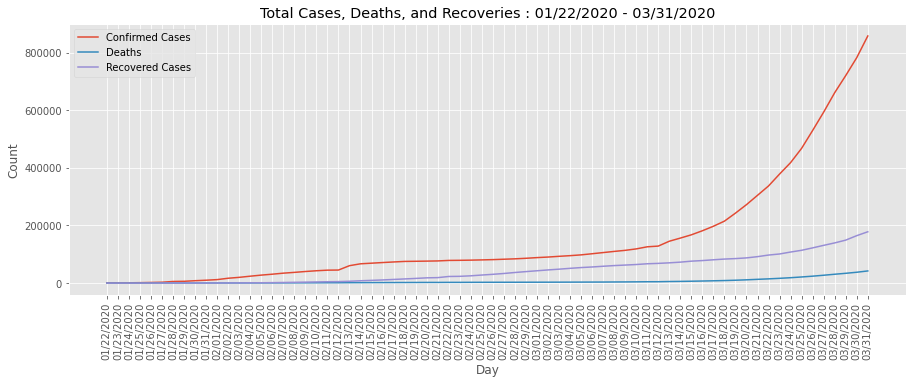

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 4. Create a new column in the dataframe called **“closed cases”**

In [ ]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 5. Create a new column in the dataframe called “active cases”

In [ ]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 6. Create one **plot** showing the trend of number of active cases and closed cases 

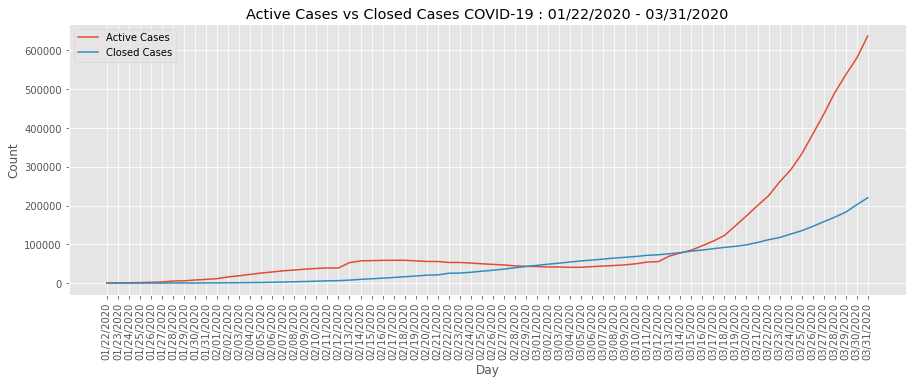

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

In [ ]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i] 
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i] 
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i] 
    recovGF_lst.append(recoveredGF);
  

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 01/22/2020 - 03/31/2020')

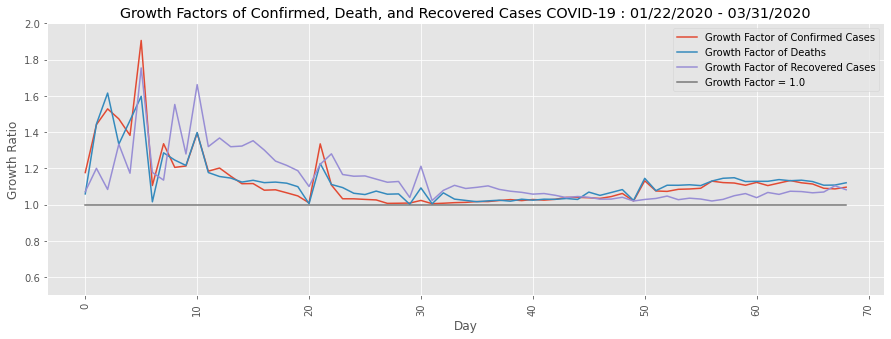

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [ ]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]


### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [ ]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

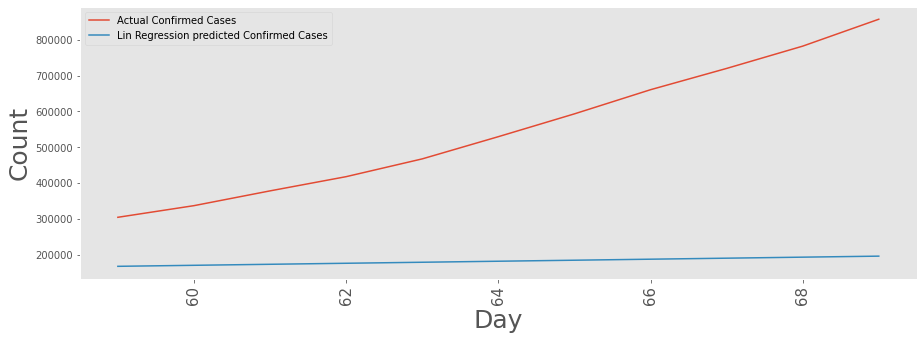

MAE: 181791.423099402
MSE: 33128805402.917187


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))

#### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

In [ ]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)


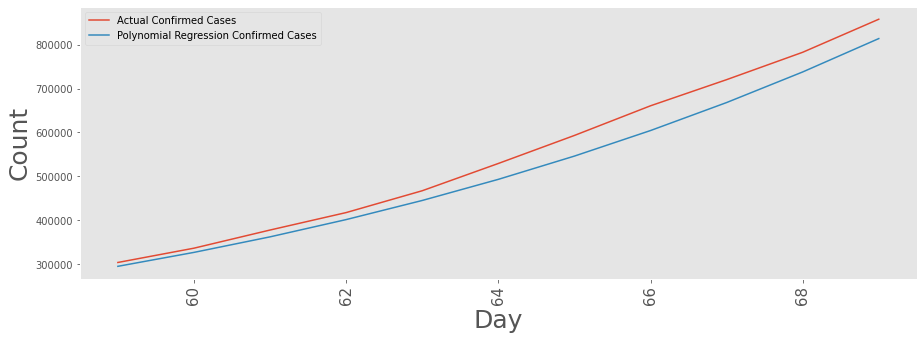

MAE: 31989.752678661967
MSE: 1314905592.3565953


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_pred,
         label = "Polynomial Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_poly_pred, y_test))
print('MSE:',mean_squared_error(test_poly_pred, y_test))

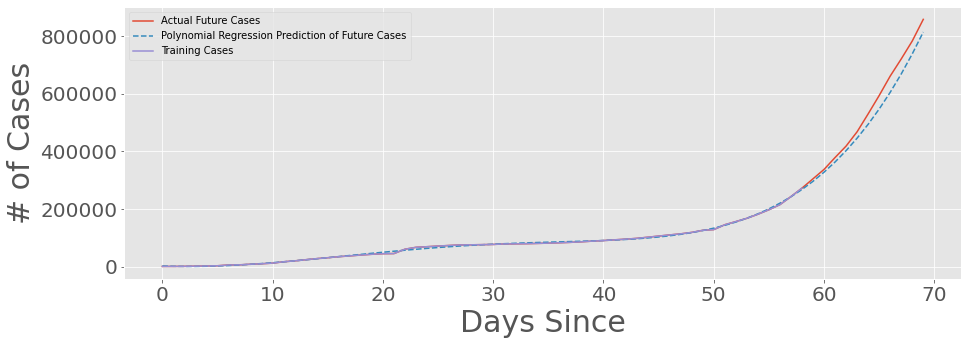

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         poly_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 9.2 Ridge Regression

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)



In [ ]:
bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.01, 'lambda_2': 1e-07, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 1e-07}


In [ ]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

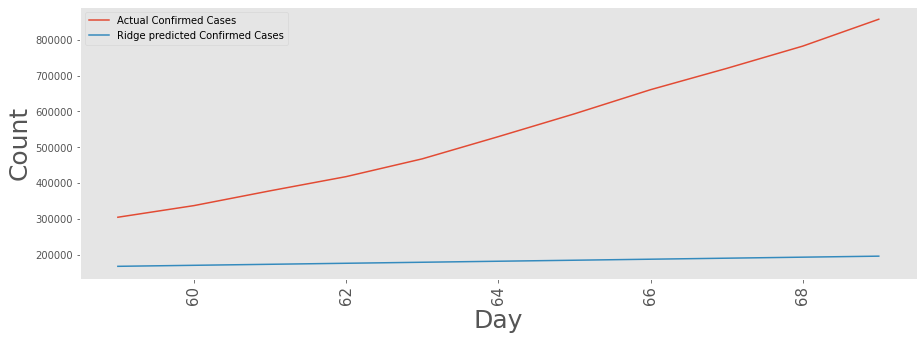

MAE: 181588.76120686907
MSE: 33054982293.80509


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))

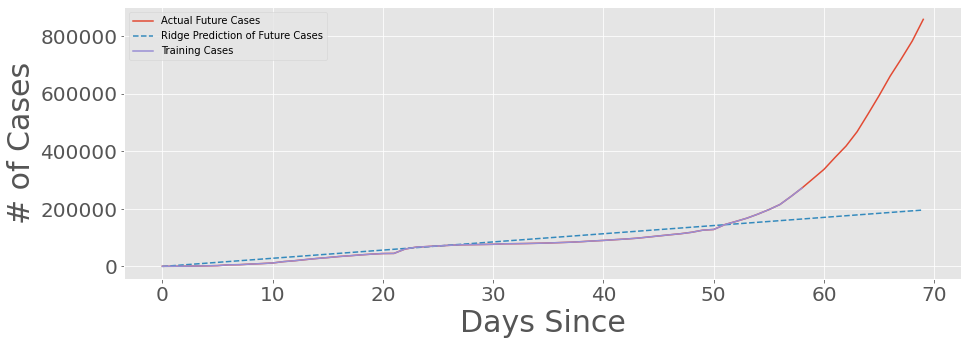

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### Polynomial Ridge Regression

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [ ]:
bayesian_search_poly.fit(poly_X_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.001, 'lambda_2': 0.0001, 'lambda_1': 1e-06, 'alpha_2': 1e-06, 'alpha_1': 1e-07}


In [ ]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)

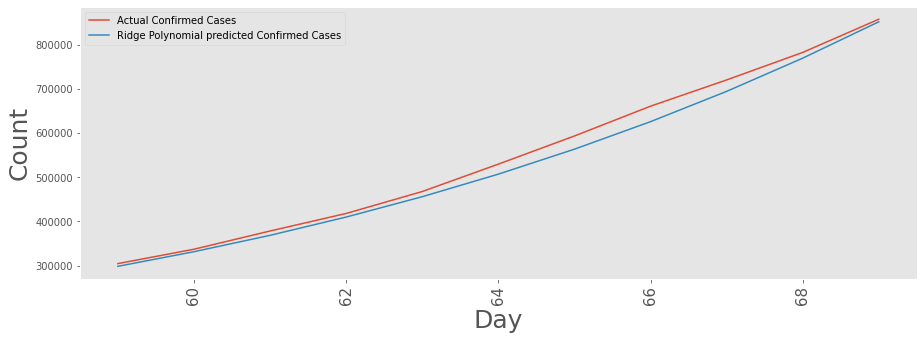

MAE: 15796.249322793743
MSE: 352570934.9098647


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

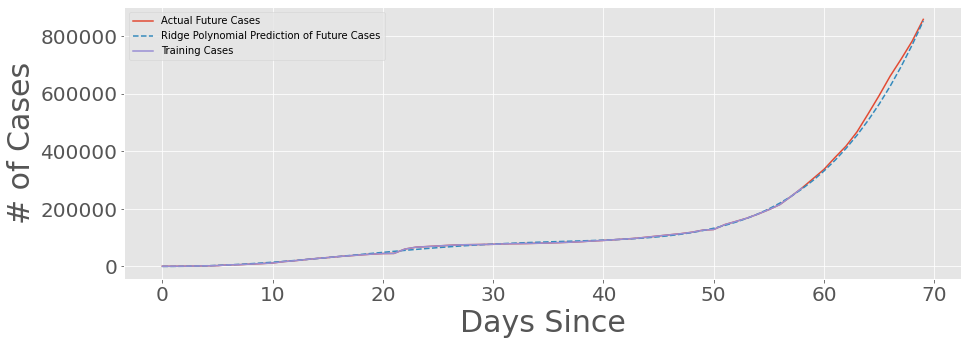

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:',mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print ('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('\tMSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

Polynomial Regression 
	MAE: 31989.752678661967
	MSE: 1314905592.3565953

Ridge Polynomial Regression 
	MAE: 15796.249322793743
	MSE: 352570934.9098647


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.

## Decision Tree Regressor on normal data along with application of GridSearchCV for hyperparameter tuning

In [ ]:
#hyper parameters for decision tree regressor
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
#initialising the regressor
dec_model = DecisionTreeRegressor(random_state = 0)

In [ ]:
#initialising gridsearchcv
dec_tune_model = GridSearchCV(dec_model, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 3, verbose = 3)

In [ ]:
#fiting the model
dec_tune_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-161133509.407 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-12801804975.062 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-8727563720.796 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-161133509.407 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-7866927069.903 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_sampl

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#best hyper parameter values after search
dec_tune_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
#prediction using the above hyper parameters
dec_model = DecisionTreeRegressor(max_depth = 5, max_features = 'auto', max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf= 0.1, splitter = 'best')
dec_model.fit(X_train, y_train)
y_test_dec_pred = dec_model.predict(X_test)
y_dec_pred = dec_model.predict(X)

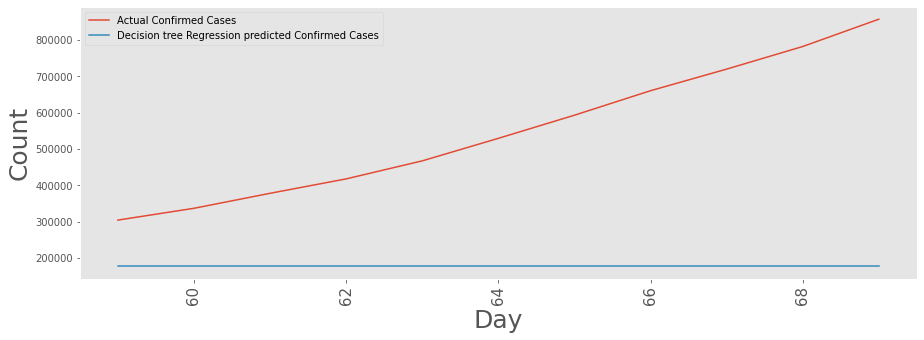

MAE: 177212.18181818185
MSE: 31404157394.76033


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_dec_pred,
         label = "Decision tree Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (y_test_dec_pred, X_test))
print('MSE:', mean_squared_error  (y_test_dec_pred, X_test))

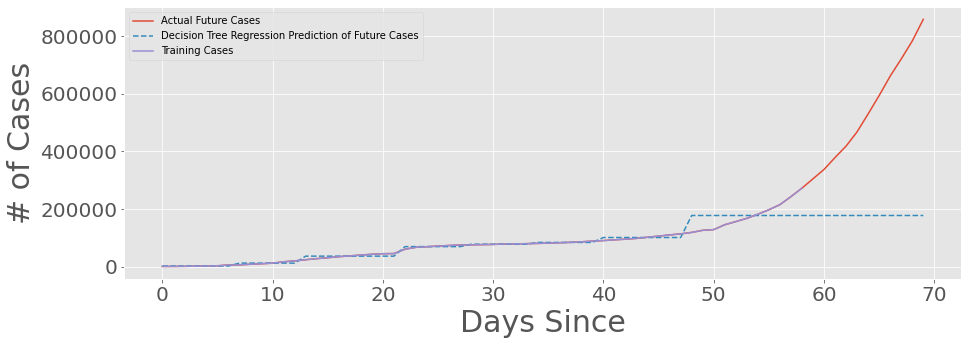

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_dec_pred,
         label = 'Decision Tree Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Decision Tree Regressor on poly data

In [ ]:
#training and prediction
dec_model_tuned = DecisionTreeRegressor(max_depth = 5, max_features = 'auto', max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf= 0.1, splitter = 'best')
dec_model_tuned.fit(poly_X_train, y_train)
test_poly_dec_pred = dec_model_tuned.predict(poly_X_test)
dec_poly_pred = dec_model_tuned.predict(poly_X)

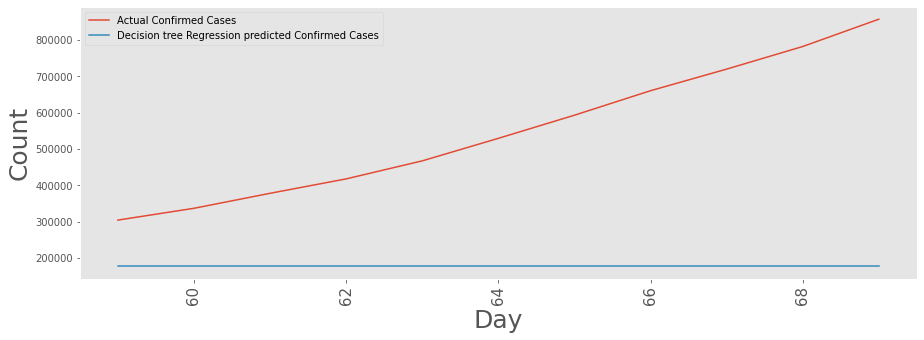

MAE: 177212.18181818185
MSE: 31404157394.76033


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_dec_pred,
         label = "Decision tree Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (test_poly_dec_pred, X_test))
print('MSE:', mean_squared_error  (test_poly_dec_pred, X_test))

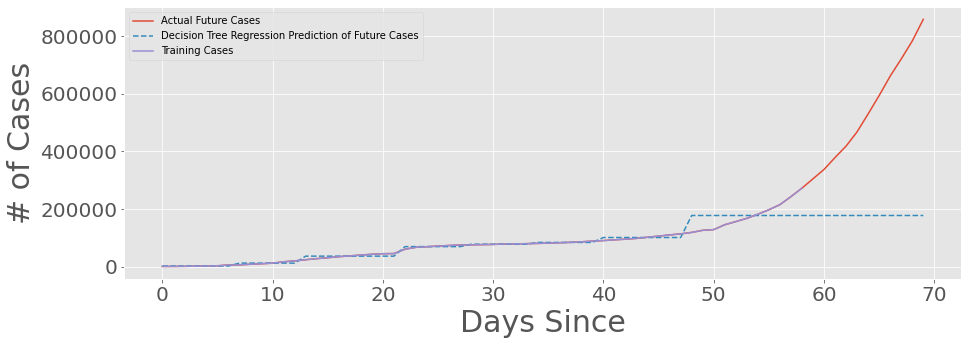

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         dec_poly_pred,
         label = 'Decision Tree Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rndf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
rndf_model.fit(X_train, y_train)
y_test_rndf_pred = rndf_model.predict(X_test)
y_rndf_pred = rndf_model.predict(X)

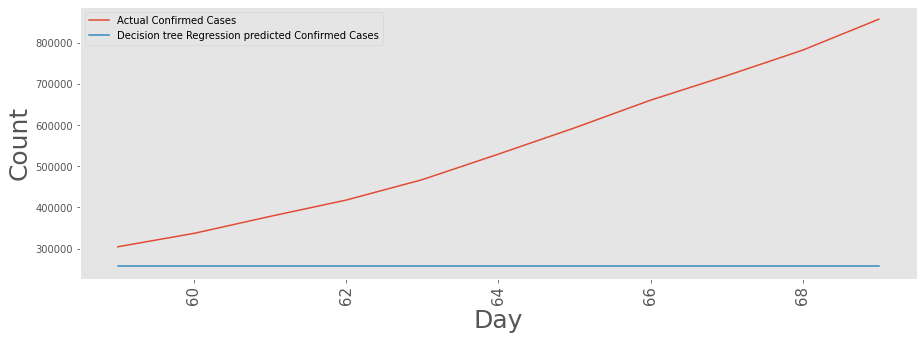

MAE: 256911.85
MSE: 66003698680.42251


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_rndf_pred,
         label = "Random forest Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (y_test_rndf_pred, X_test))
print('MSE:', mean_squared_error  (y_test_rndf_pred, X_test))

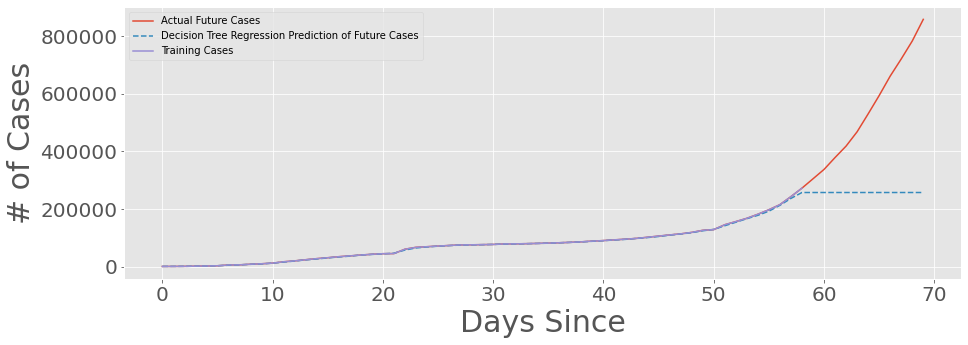

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_rndf_pred,
         label = 'Random forest Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Radom Forest Regressor with hyper parameter tuning.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rndf_model = RandomForestRegressor()
rndf_model_tuned = RandomizedSearchCV(estimator = rndf_model,
                               param_distributions = random_grid, 
                               n_iter = 100,
                               cv = 3,
                               verbose = 2,
                               random_state = 42,
                               n_jobs = -1)

In [ ]:
rndf_model_tuned.fit(X_train, y_train)
y_test_rndf_pred = rndf_model_tuned.predict(X_test)
y_rndf_pred = rndf_model_tuned.predict(X)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rndf_model_tuned.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

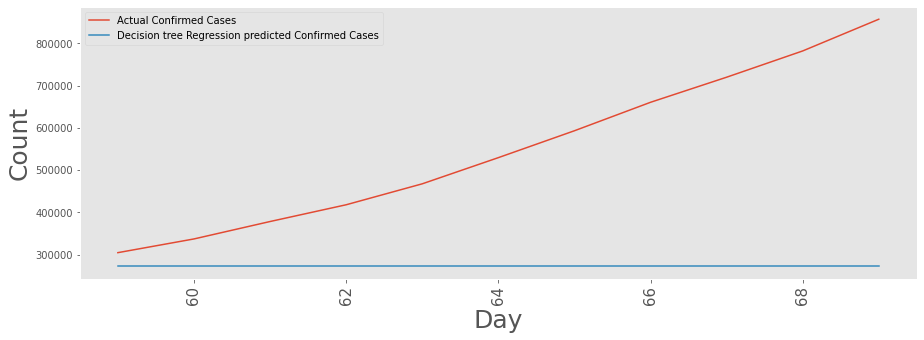

MAE: 272103.0
MSE: 74040042619.0


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_rndf_pred,
         label = "Random Forest Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (y_test_rndf_pred, X_test))
print('MSE:', mean_squared_error  (y_test_rndf_pred, X_test))

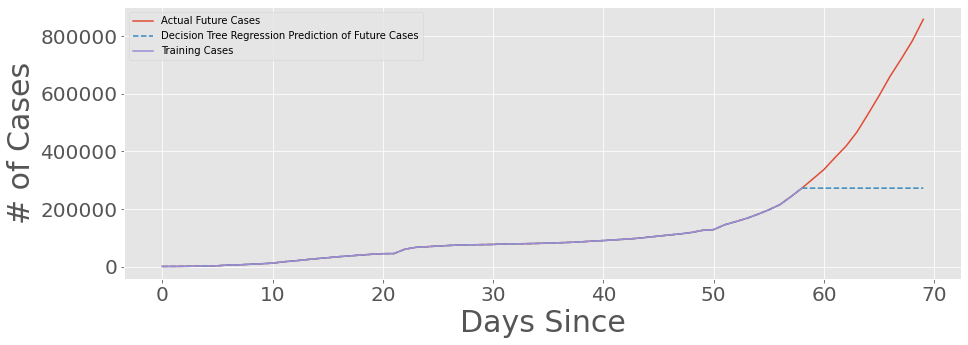

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_rndf_pred,
         label = 'Random Forest Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
y_test_svr_pred = svr_model.predict(X_test)
y_svr_pred = svr_model.predict(X)

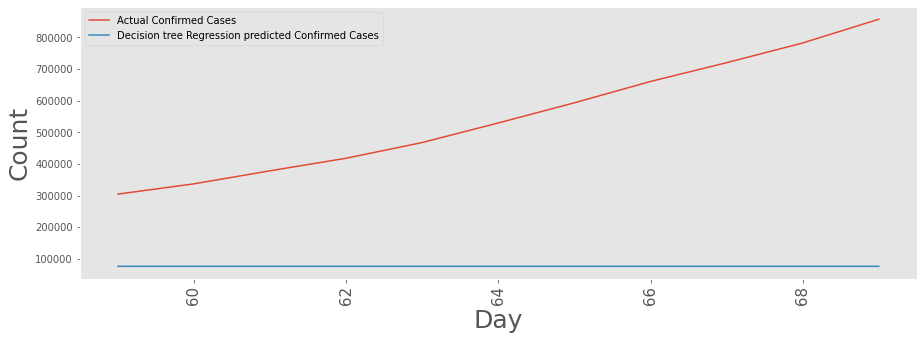

MAE: 76144.79381075263
MSE: 5798029658.824456


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_svr_pred,
         label = "Support Vector Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (y_test_svr_pred, X_test))
print('MSE:', mean_squared_error  (y_test_svr_pred, X_test))

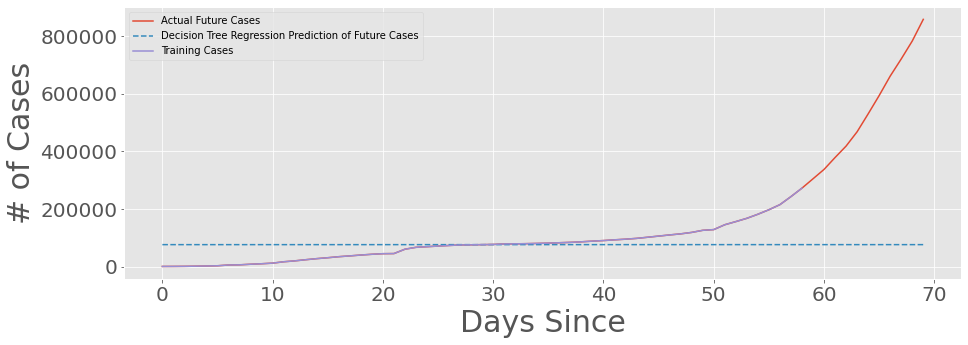

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_svr_pred,
         label = 'Support Vector Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## tuning the svr model

In [ ]:
svr_model_tuned = RandomizedSearchCV(SVR(gamma='auto'), {
        'C': [1,20,30],
        'kernel': ['rbf']
    }, 
    cv=2, 
    return_train_score=False, 
    n_iter=2
)

In [ ]:
svr_model_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=SVR(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 20, 30], 'kernel': ['rbf']})

In [ ]:
svr_model_tuned.best_params_

{'C': 30, 'kernel': 'rbf'}

In [ ]:
y_test_svr_pred = svr_model_tuned.predict(X_test)
y_svr_pred = svr_model_tuned.predict(X)

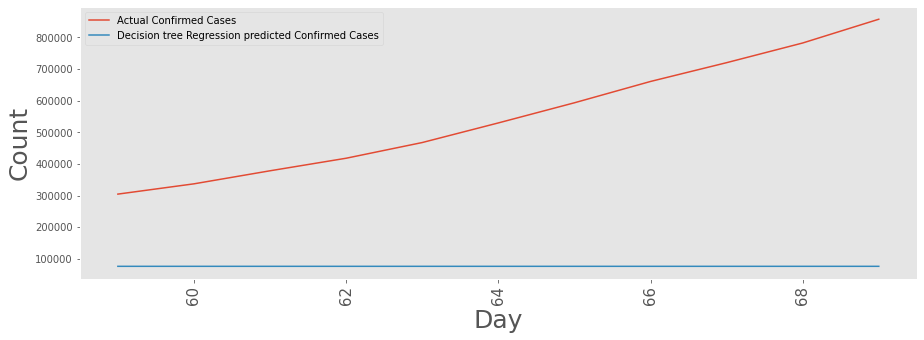

MAE: 76136.1042219961
MSE: 5796706398.062174


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_svr_pred,
         label = "Support Vector Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (y_test_svr_pred, X_test))
print('MSE:', mean_squared_error  (y_test_svr_pred, X_test))

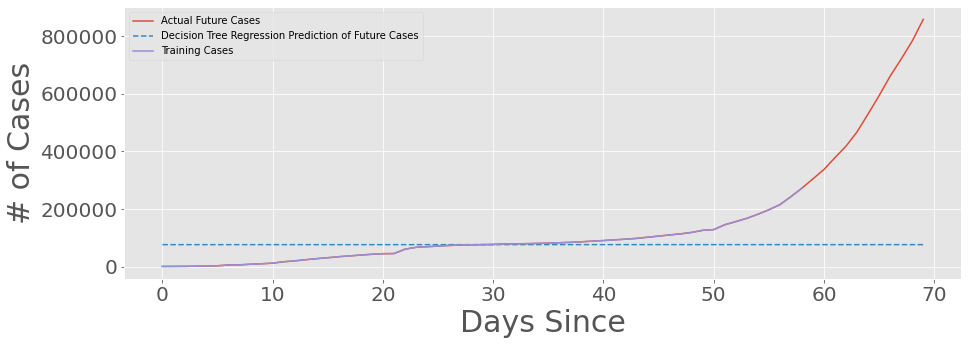

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_svr_pred,
         label = 'Support Vector Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## KNeighborsRegressor

In [ ]:
from sklearn import neighbors

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
knn_model = neighbors.KNeighborsRegressor()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
knn_model.fit(X_train_scaled, y_train)
y_test_knn_pred = knn_model.predict(X_test_scaled)
y_knn_pred = knn_model.predict(X_scaled)

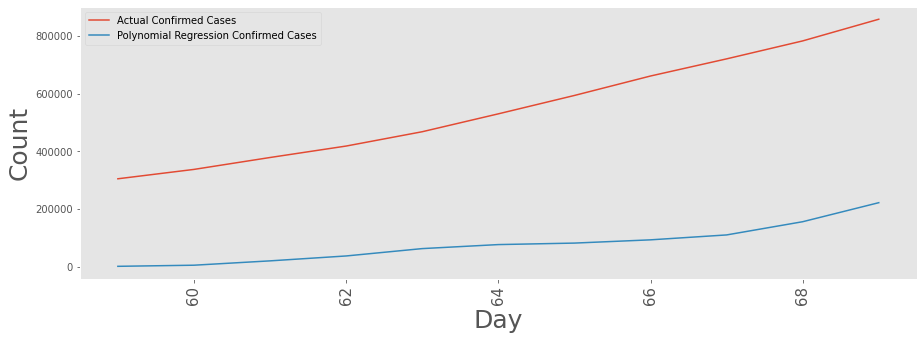

MAE: 471342.3272727273
MSE: 236225634892.15997


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_knn_pred,
         label = "KNeighbors Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_test_knn_pred, y_test))
print('MSE:',mean_squared_error(y_test_knn_pred, y_test))

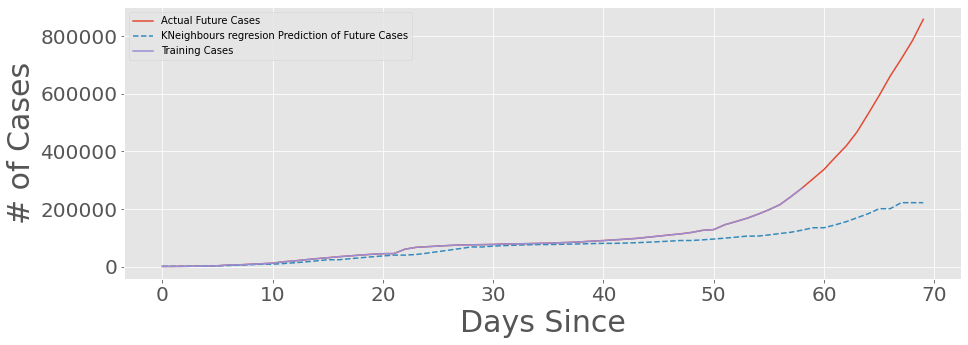

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_knn_pred,
         label = 'KNeighbours regresion Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
n_neighbors = [int(x) for x in range(1,21)]
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree', 'brute']
metrics = ['minkowski','euclidean', 'manhattan','hamming']

grid_for_tuning = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'metric' : metrics,
}

In [ ]:
knn_model = neighbors.KNeighborsRegressor()

In [ ]:
knn_model_tuned = RandomizedSearchCV(estimator = knn_model,
                                     param_distributions = grid_for_tuning,
                                     n_iter = 100,
                                     cv = 3,
                                     verbose = 2,
                                     random_state = 42,
                                     n_jobs = -1)

In [ ]:
knn_model_tuned.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'hamming'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [ ]:
knn_model_tuned.best_params_

{'algorithm': 'kd_tree',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [ ]:
y_test_knn_pred = knn_model_tuned.predict(X_test_scaled)
y_knn_pred = knn_model_tuned.predict(X_scaled)

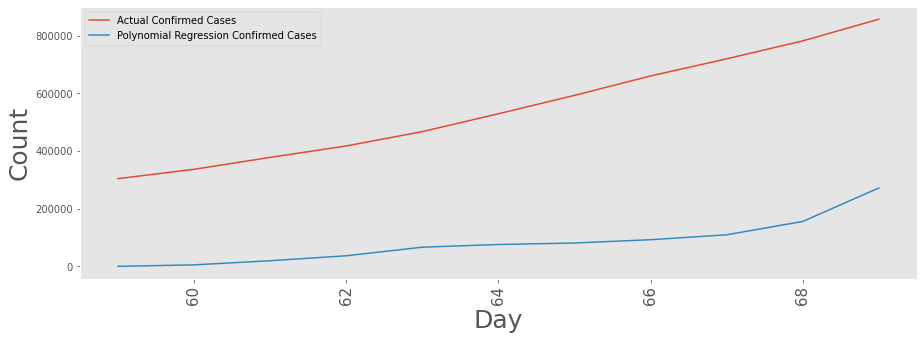

MAE: 466399.0
MSE: 230330637038.81818


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_knn_pred,
         label = "KNeighbors Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_test_knn_pred, y_test))
print('MSE:',mean_squared_error(y_test_knn_pred, y_test))

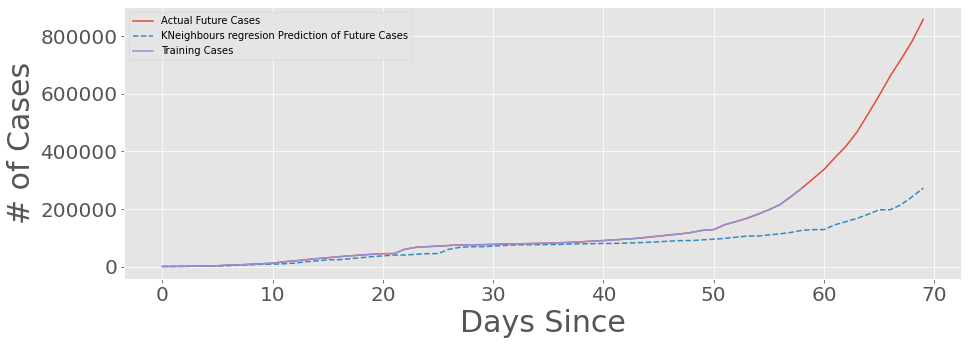

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_knn_pred,
         label = 'KNeighbours regresion Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha = 0.55, normalize = True)
lasso_model.fit(X_train_scaled, y_train)
y_test_lasso_pred = lasso_model.predict(X_test_scaled)
y_lasso_pred = lasso_model.predict(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


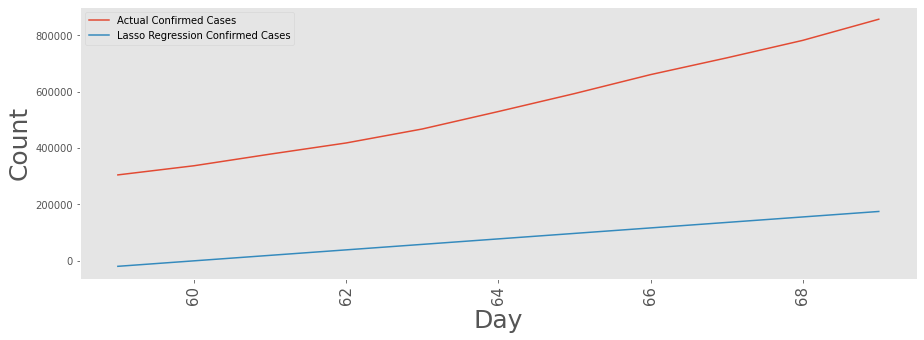

MAE: 472682.3713405239
MSE: 237263068474.918


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_lasso_pred,
         label = "Lasso Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(y_test_lasso_pred, y_test))
print('MSE:',mean_squared_error(y_test_lasso_pred, y_test))

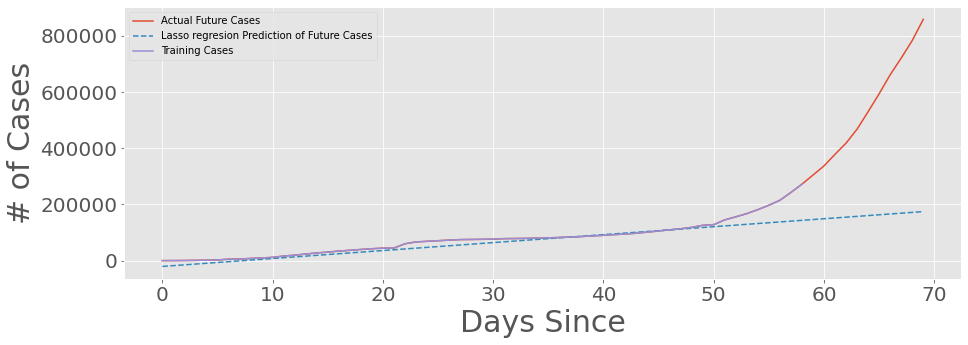

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         y_lasso_pred,
         label = 'Lasso regresion Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Analysing the Models used so far

## Data preparation for analysis

In [ ]:
# dictonary for all the models
models_dict = {
    'Linear Regression' : LinearRegression(fit_intercept = False),
    'Polynomial Regression' : LinearRegression(fit_intercept = False),
    'Ridge Regression' : BayesianRidge(fit_intercept=False),
    'Poly Ridge Regression' : BayesianRidge(fit_intercept=False,tol= 0.0001, lambda_2= 0.0001, lambda_1= 0.0001, alpha_2=0.0001, alpha_1= 0.0001),
    'Decision Tree Regression' : DecisionTreeRegressor(random_state = 0),
    'Random Forest Regression' : RandomForestRegressor(n_estimators = 100, random_state = 0),
    'SVR' : SVR(kernel = 'rbf'),
    'KNeighbors Regressor' : neighbors.KNeighborsRegressor(),
}

In [ ]:
# dictonary for models with tuned hyperparameters
models_dict_tuned = {
    'Ridge Regression' : BayesianRidge(fit_intercept=False,tol= 0.01, lambda_2= 0.0001, lambda_1= 0.0001, alpha_2=1e-06, alpha_1= 1e-07),
    'Polynomial Regression' : LinearRegression(fit_intercept = False),
    'DecisionTree Regression' : DecisionTreeRegressor(max_depth = 5, max_features = 'auto', max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf= 0.1, splitter = 'best'),
    'RandomForest Regression' : RandomForestRegressor(n_estimators = 100, random_state = 0),
    'SVR' : SVR(gamma = 'auto', C = 30, kernel = 'rbf'),
    'KNeighbors Regressor' : neighbors.KNeighborsRegressor(algorithm = 'kd_tree', metric = 'minkowski', n_neighbors = 1, weights = 'uniform'),
    
}

In [ ]:
# function to train one model at a time and return the required metrics
def train_models(model, X_train, X_test, X, y_train, y_test, y):
  model_reg = model.fit(X_train, y_train)

  y_test_model_pred = model_reg.predict(X_test)
  y_model_pred = model_reg.predict(X)
  r2_test = r2_score(y_test, y_test_model_pred)
  r2_main = r2_score(y, y_model_pred)
  mae = mean_absolute_error(y_test_model_pred, y_test)
  mse = mean_squared_error(y_test_model_pred, y_test)

  return r2_test, r2_main, mae, mse

In [ ]:
# function to facilitate the whole process of training for all models and prepare dataset for analysis
def get_model_metrics(model_dict, X_train, X_test, X, y_train, y_test, y, poly_X_train, poly_X_test, poly_X):
  model_r2_dict = {}
  model_r2_test_dict = {}
  model_mae_dict = {}
  model_mse_dict = {}
  for i, j in model_dict.items():
    if i not in model_r2_test_dict:
      model_r2_test_dict[i] = 0
      model_r2_dict[i] = 0
      model_mae_dict[i] = 0
      model_mse_dict[i] = 0
    if i == 'Polynomial Regression':
      model_r2_test_dict[i], model_r2_dict[i], model_mae_dict[i], model_mse_dict[i] = train_models(j, poly_X_train, poly_X_test, poly_X, y_train, y_test, y)
    else:
      model_r2_test_dict[i], model_r2_dict[i], model_mae_dict[i], model_mse_dict[i] = train_models(j, X_train, X_test, X, y_train, y_test, y)
  return model_r2_test_dict, model_r2_dict, model_mae_dict, model_mse_dict

## Plots of Models comparision on different metrics

In [ ]:
# execution of functions to obtain the required metric dataset for analysis
model_acc_dict = {}
model_acc_test_dict = {}
model_mae_dict = {}
model_mse_dict = {}
model_acc_dict_polu = {}
model_acc_test_dict_poly = {}
model_mae_dict_poly = {}
model_mse_dict_poly = {}

model_r2_test_dict, model_r2_dict, model_mae_dict, model_mse_dict = get_model_metrics(models_dict,  X_train, X_test, X, y_train, y_test, y, poly_X_train, poly_X_test, poly_X)
model_r2_test_dict_poly, model_r2_dict_poly, model_mae_dict_poly, model_mse_dict_poly = get_model_metrics(models_dict,  poly_X_train, poly_X_test, poly_X, y_train, y_test, y, poly_X_train, poly_X_test, poly_X)

### Plot for R2_score of the models on Test Dataset set and its Polynomial form

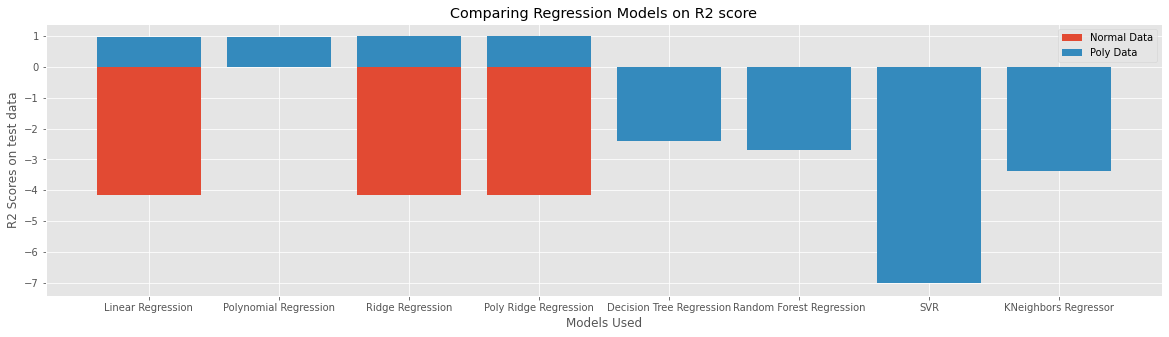

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_r2_test_dict.keys(), model_r2_test_dict.values(), label = "Normal Data")
plt.bar(model_r2_test_dict_poly.keys(), model_r2_test_dict_poly.values(), label = "Poly Data")
plt.xlabel("Models Used")
plt.ylabel("R2 Scores on test data")
plt.legend()
plt.title("Comparing Regression Models on R2 score")
plt.show()

### Plot for R2_score of the models on Dataset set and its Polynomial form

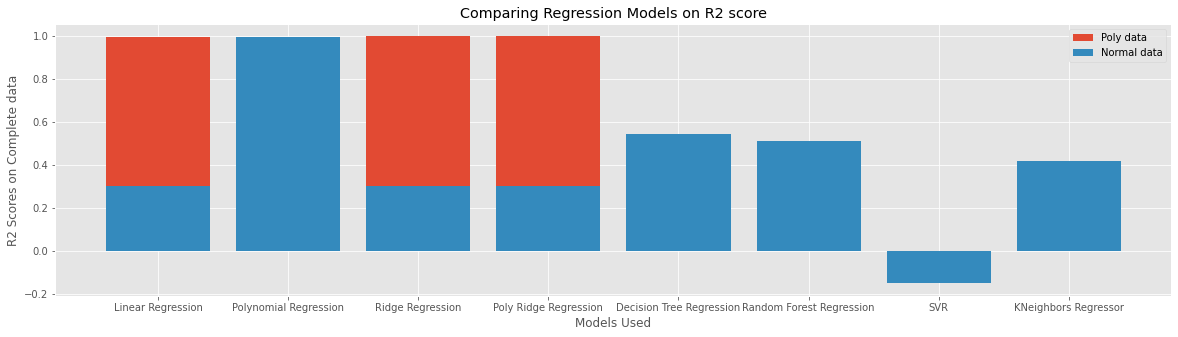

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_r2_dict_poly.keys(), model_r2_dict_poly.values(), label = 'Poly data' )
plt.bar(model_r2_dict.keys(), model_r2_dict.values(), label = 'Normal data')
plt.xlabel("Models Used")
plt.ylabel("R2 Scores on Complete data")
plt.legend()
plt.title("Comparing Regression Models on R2 score")
plt.show()

### Plot for MAE of the models on Dataset set and its Polynomial form

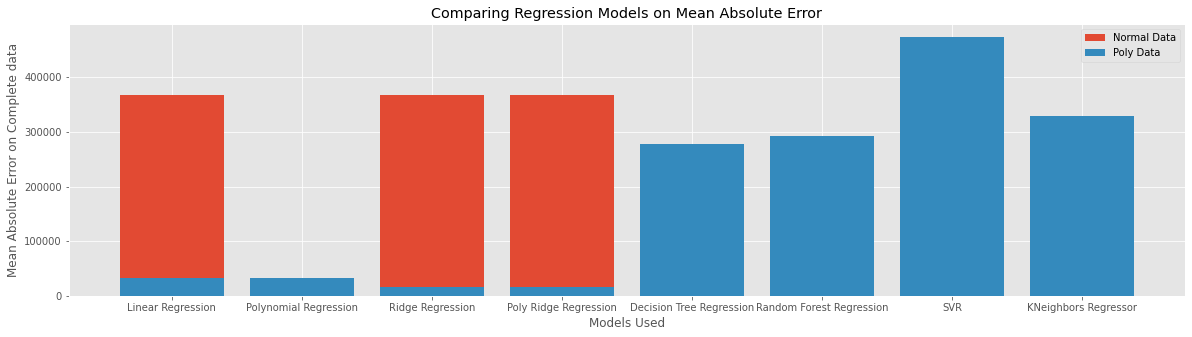

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_mae_dict.keys(), model_mae_dict.values(), label = "Normal Data")
plt.bar(model_mae_dict_poly.keys(), model_mae_dict_poly.values(), label = "Poly Data")
plt.xlabel("Models Used")
plt.ylabel("Mean Absolute Error on Complete data")
plt.legend()
plt.title("Comparing Regression Models on Mean Absolute Error")
plt.show()

### Plot for MSE of the models on Dataset set and its Polynomial form

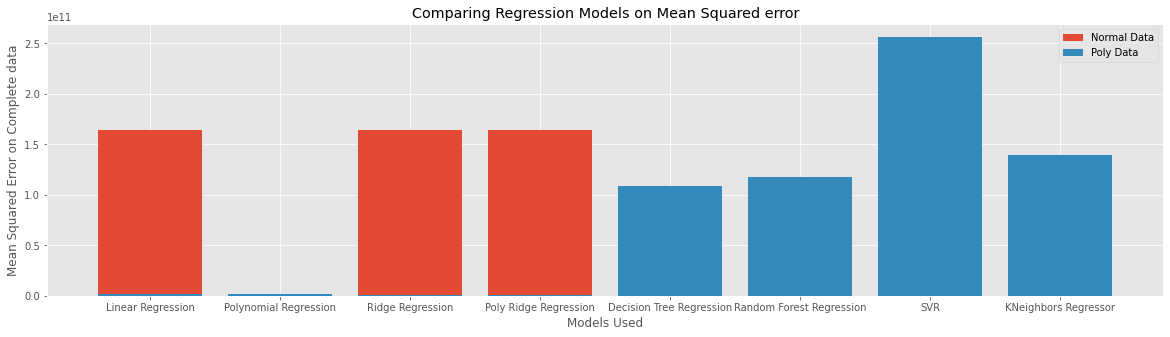

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_mse_dict.keys(), model_mse_dict.values(), label = "Normal Data")
plt.bar(model_mse_dict_poly.keys(), model_mse_dict_poly.values(), label = "Poly Data")
plt.xlabel("Models Used")
plt.legend()
plt.ylabel("Mean Squared Error on Complete data")
plt.title("Comparing Regression Models on Mean Squared error")
plt.show()

## Plots after HyperParameter tuning

In [ ]:
# Dictonaries to maintain the records of all the necessary metrics values
model_acc_dict = {}
model_acc_test_dict = {}
model_mae_dict = {}
model_mse_dict = {}
model_acc_dict_polu = {}
model_acc_test_dict_poly = {}
model_mae_dict_poly = {}
model_mse_dict_poly = {}

model_r2_test_dict, model_r2_dict, model_mae_dict, model_mse_dict = get_model_metrics(models_dict_tuned,  X_train, X_test, X, y_train, y_test, y, poly_X_train, poly_X_test, poly_X)
model_r2_test_dict_poly, model_r2_dict_poly, model_mae_dict_poly, model_mse_dict_poly = get_model_metrics(models_dict_tuned,  poly_X_train, poly_X_test, poly_X, y_train, y_test, y, poly_X_train, poly_X_test, poly_X)

### Plot for R2_score of the models on Test Dataset set and its Polynomial form

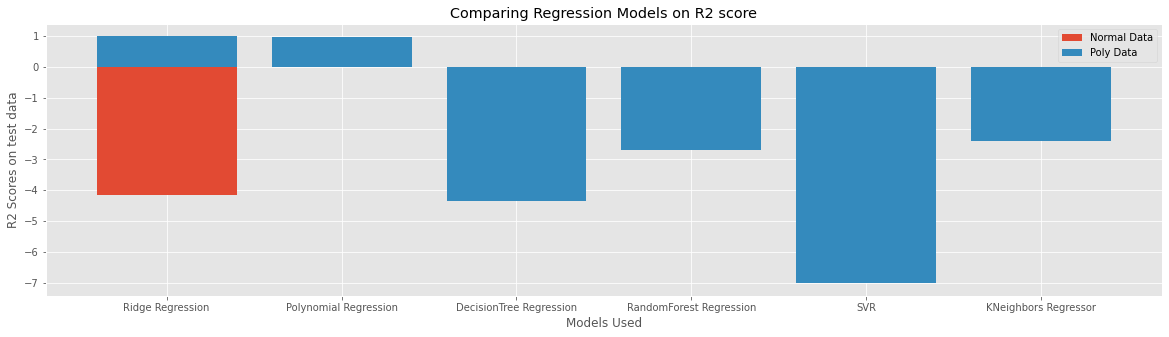

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_r2_test_dict.keys(), model_r2_test_dict.values(), label = "Normal Data")
plt.bar(model_r2_test_dict_poly.keys(), model_r2_test_dict_poly.values(), label = "Poly Data")
plt.xlabel("Models Used")
plt.ylabel("R2 Scores on test data")
plt.legend()
plt.title("Comparing Regression Models on R2 score")
plt.show()

### Plot for R2_score of the models on Dataset set and its Polynomial form

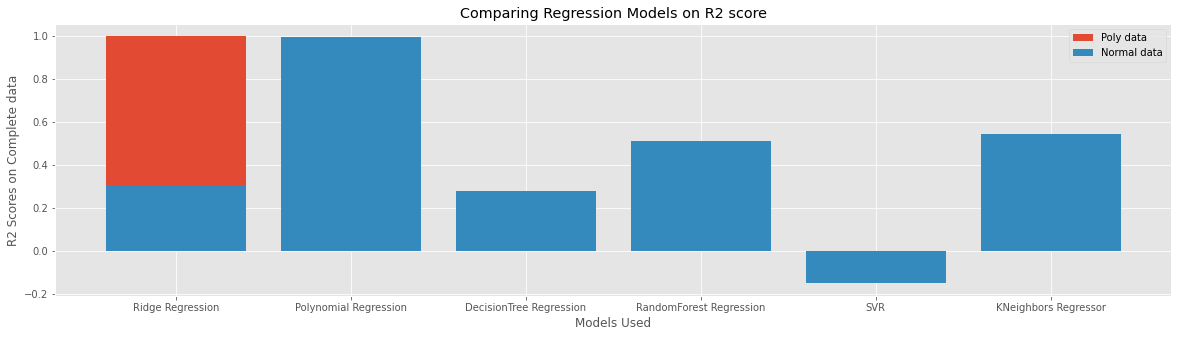

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_r2_dict_poly.keys(), model_r2_dict_poly.values(), label = 'Poly data' )
plt.bar(model_r2_dict.keys(), model_r2_dict.values(), label = 'Normal data')
plt.xlabel("Models Used")
plt.ylabel("R2 Scores on Complete data")
plt.legend()
plt.title("Comparing Regression Models on R2 score")
plt.show()

### Plot for MAE of the models on Dataset set and its Polynomial form

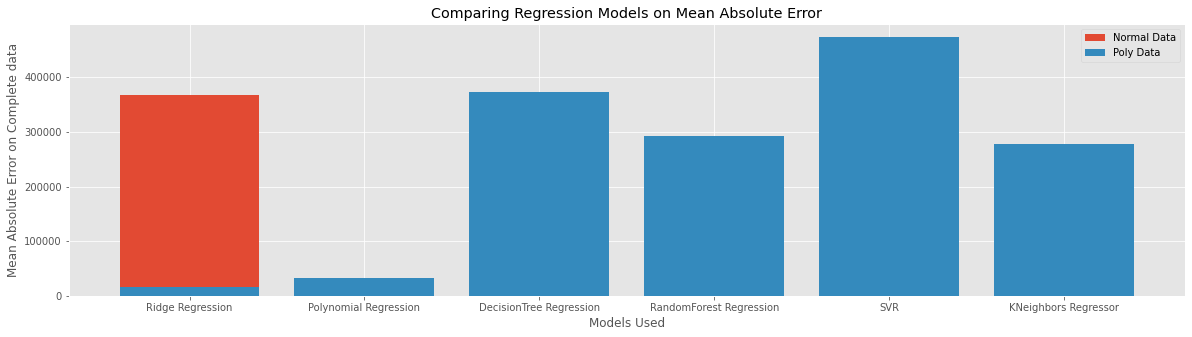

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_mae_dict.keys(), model_mae_dict.values(), label = "Normal Data")
plt.bar(model_mae_dict_poly.keys(), model_mae_dict_poly.values(), label = "Poly Data")
plt.xlabel("Models Used")
plt.ylabel("Mean Absolute Error on Complete data")
plt.legend()
plt.title("Comparing Regression Models on Mean Absolute Error")
plt.show()

### Plot for MSE of the models on Dataset set and its Polynomial form

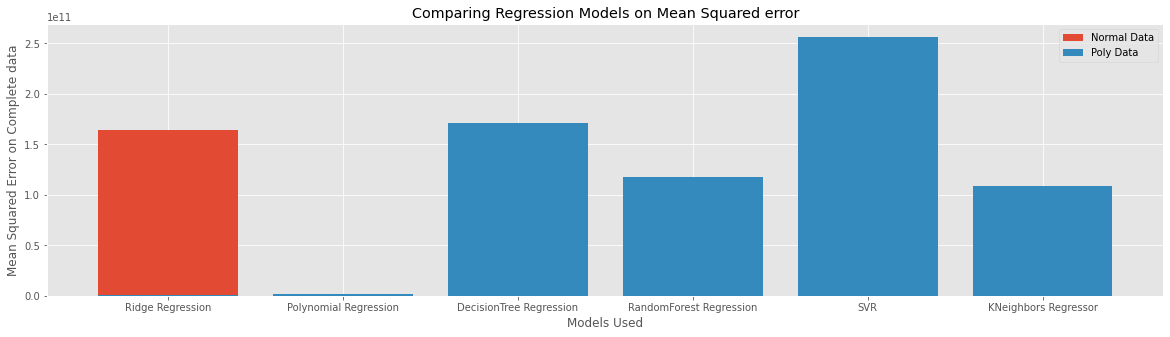

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(model_mse_dict.keys(), model_mse_dict.values(), label = "Normal Data")
plt.bar(model_mse_dict_poly.keys(), model_mse_dict_poly.values(), label = "Poly Data")
plt.xlabel("Models Used")
plt.legend()
plt.ylabel("Mean Squared Error on Complete data")
plt.title("Comparing Regression Models on Mean Squared error")
plt.show()